<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Create-reports-for-each-inspection-batch" data-toc-modified-id="Create-reports-for-each-inspection-batch-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create reports for each inspection batch</a></span></li><li><span><a href="#Analysis-of-inspection-batches" data-toc-modified-id="Analysis-of-inspection-batches-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis of inspection batches</a></span></li><li><span><a href="#Error-analysis" data-toc-modified-id="Error-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Error analysis</a></span><ul class="toc-item"><li><span><a href="#Boxplot-of-the-job_duration-batches" data-toc-modified-id="Boxplot-of-the-job_duration-batches-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Boxplot of the job_duration batches</a></span></li><li><span><a href="#Boxplot-of-the-job_duration-batches" data-toc-modified-id="Boxplot-of-the-job_duration-batches-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Boxplot of the job_duration batches</a></span></li><li><span><a href="#Boxplot-of-the-job_duration-batches" data-toc-modified-id="Boxplot-of-the-job_duration-batches-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Boxplot of the job_duration batches</a></span></li></ul></li><li><span><a href="#Interpolations" data-toc-modified-id="Interpolations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interpolations</a></span><ul class="toc-item"><li><span><a href="#Box-Plots-interpolated-for-job_duration" data-toc-modified-id="Box-Plots-interpolated-for-job_duration-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Box Plots interpolated for <code>job_duration</code></a></span></li><li><span><a href="#Box-Plots-interpolated-for-elapsed_time" data-toc-modified-id="Box-Plots-interpolated-for-elapsed_time-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Box Plots interpolated for <code>elapsed_time</code></a></span></li></ul></li><li><span><a href="#Inspection-Time-analysis" data-toc-modified-id="Inspection-Time-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Inspection Time analysis</a></span><ul class="toc-item"><li><span><a href="#Inspection-Builds-Time" data-toc-modified-id="Inspection-Builds-Time-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Inspection Builds Time</a></span></li><li><span><a href="#Inspection-Jobs-Time" data-toc-modified-id="Inspection-Jobs-Time-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Inspection Jobs Time</a></span></li><li><span><a href="#Inspection-Builds-+-Jobs-Time" data-toc-modified-id="Inspection-Builds-+-Jobs-Time-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Inspection Builds + Jobs Time</a></span></li></ul></li></ul></div>

# Introduction

In [1]:
from thoth.lab import inspection, inspection_report, underscore

import logging
logger = logging.getLogger()
logger.handlers = []

logger = logging.getLogger()
logging.basicConfig(level=logging.INFO)

In [2]:
%env THOTH_DEPLOYMENT_NAME     thoth-core-psi-stage
%env THOTH_CEPH_BUCKET         thoth
%env THOTH_CEPH_BUCKET_PREFIX  data/thoth
%env THOTH_S3_ENDPOINT_URL     https://s3.upshift.redhat.com/

env: THOTH_DEPLOYMENT_NAME=thoth-core-psi-stage
env: THOTH_CEPH_BUCKET=thoth
env: THOTH_CEPH_BUCKET_PREFIX=data/thoth
env: THOTH_S3_ENDPOINT_URL=https://s3.upshift.redhat.com/


In [3]:
identifier_inspection = [
    "64-matrix-size",
    "128-matrix-size",
    "256-matrix-size",
    "test-ms", # 512-matrix-size
    "1024-matrix-size",
    "2048-matrix-size",
    "4096-matrix-size"
]

static_figure=True

In [4]:
list_ids_filtered = inspection.filter_inspection_ids_list(identifier_inspection)

INFO:thoth.lab.inspection:Retrieving all inspection ids
INFO:thoth.lab.inspection:There are 700 inspection runs selected: [('64-matrix-size', 100), ('128-matrix-size', 100), ('256-matrix-size', 100), ('test-ms', 100), ('1024-matrix-size', 100), ('2048-matrix-size', 100), ('4096-matrix-size', 100)] respectively


In [ ]:
inspection_results_dict = inspection.aggregate_inspection_results_dict(list_ids_filtered, identifier_inspection, limit_results=True)

In [6]:
df_total = inspection.create_inspection_results_df_dict(inspection_results_dict)

INFO:thoth.lab.inspection:Analyzing inspection batch: 64-matrix-size
INFO:thoth.lab.inspection:Analyzing inspection batch: 128-matrix-size
INFO:thoth.lab.inspection:Analyzing inspection batch: 256-matrix-size
INFO:thoth.lab.inspection:Analyzing inspection batch: test-ms
INFO:thoth.lab.inspection:Analyzing inspection batch: 1024-matrix-size
INFO:thoth.lab.inspection:Analyzing inspection batch: 2048-matrix-size
INFO:thoth.lab.inspection:Analyzing inspection batch: 4096-matrix-size


# Create reports for each inspection batch

In [ ]:
# Collect all reports and provide results
tot_reports = inspection_report.create_tot_report_dict(identifier_inspection, df_total)

# Analysis of inspection batches

In [ ]:
inspection.create_inspection_analysis_plots(df_total["64-matrix-size"])

In [9]:
inspection_report.create_feature_summary(tot_reports)

INFO:thoth.lab.inspection_report:===============================================================================
INFO:thoth.lab.inspection_report:hardware
INFO:thoth.lab.inspection_report:===============================================================================
INFO:thoth.lab.inspection_report:---------------------------------------------------------------------------
INFO:thoth.lab.inspection_report:platform
INFO:thoth.lab.inspection_report:---------------------------------------------------------------------------
INFO:thoth.lab.inspection_report:processor
INFO:thoth.lab.inspection_report:---------------------------------------------------------------------------
INFO:thoth.lab.inspection_report:ncpus
INFO:thoth.lab.inspection_report:===============================================================================
INFO:thoth.lab.inspection_report:software_stack
INFO:thoth.lab.inspection_report:===============================================================================
INFO:th

In [10]:
inspection_report.create_feature_summary(tot_reports, explanation=True)

INFO:thoth.lab.inspection_report:=========================================================================
INFO:thoth.lab.inspection_report:hardware
INFO:thoth.lab.inspection_report:=========================================================================
INFO:thoth.lab.inspection_report:=========================================================================
INFO:thoth.lab.inspection_report:software_stack
INFO:thoth.lab.inspection_report:=========================================================================
INFO:thoth.lab.inspection_report:=========================================================================
INFO:thoth.lab.inspection_report:base_image
INFO:thoth.lab.inspection_report:=========================================================================
INFO:thoth.lab.inspection_report:=========================================================================
INFO:thoth.lab.inspection_report:pi
INFO:thoth.lab.inspection_report:================================================

# Error analysis

In [11]:
import plotly
import plotly.offline as py

In [12]:
mapping_parameters = {
    "job_duration": "job_duration",
    "build_duration": "build_duration",
    "job_log__stdout__@result__elapsed": "elapsed",
    "job_log__stdout__@result__rate": "rate"
}
dftotal, batches_parameters_map = inspection.create_inspection_batches_parameters_dataframe(
    mapping_parameters,
    df_total,
    identifier_inspection)

## Boxplot of the job_duration batches

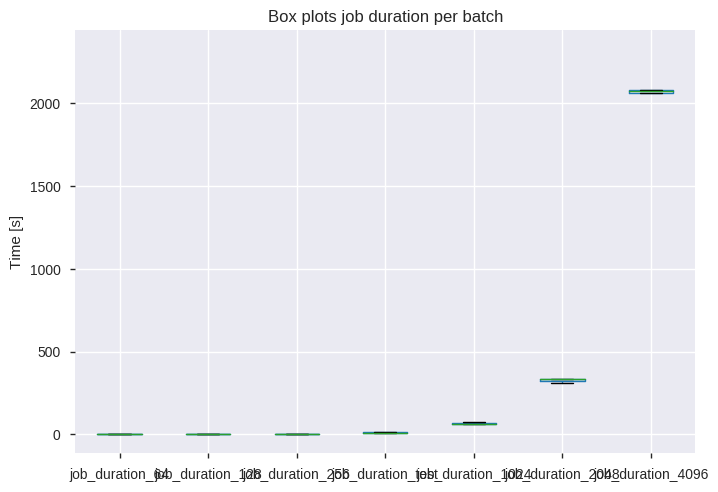

In [13]:
inspection.create_box_plot(dftotal,
                columns=batches_parameters_map["job_duration"],
                x_label="Batch identifier",
                y_label="Time [s]",
                title_box="Box plots job duration per batch",
                static=static_figure)

## Boxplot of the job_duration batches

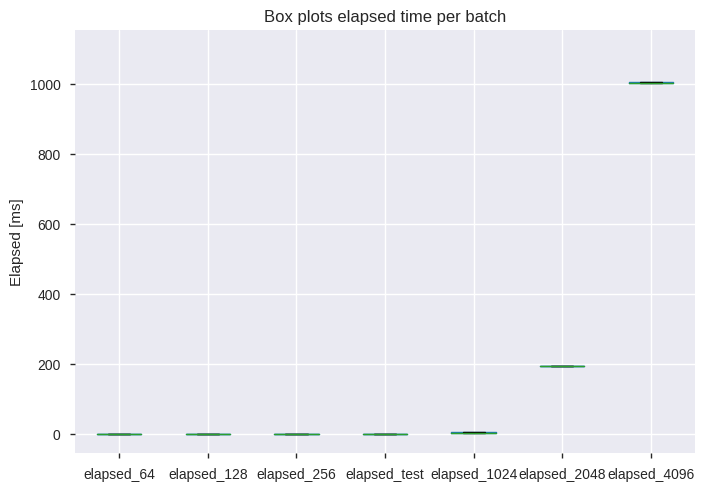

In [14]:
inspection.create_box_plot(dftotal,
                columns=batches_parameters_map["elapsed"],
                x_label="Batch identifier",
                y_label="Elapsed [ms]",
                title_box="Box plots elapsed time per batch",
                static=static_figure)

## Boxplot of the job_duration batches

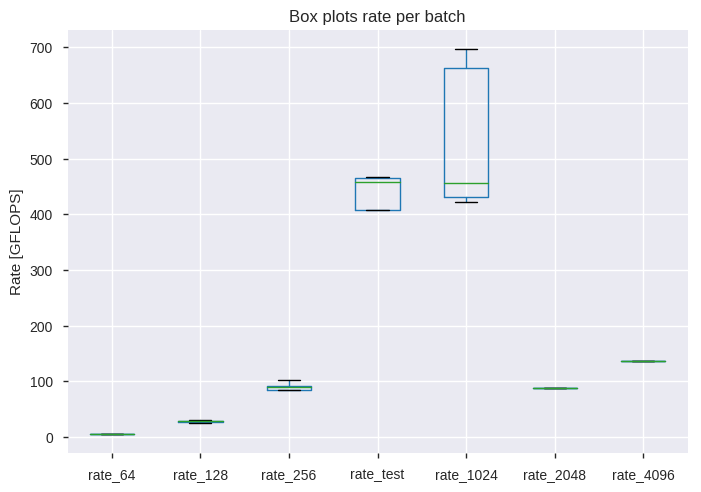

In [15]:
inspection.create_box_plot(dftotal,
                columns=batches_parameters_map["rate"],
                x_label="Batch identifier",
                y_label="Rate [GFLOPS]",
                title_box="Box plots rate per batch",
                static=static_figure)

# Interpolations

In [16]:
dftotal_statistics = {}
for parameter, key in mapping_parameters.items():
    dftotal_statistics[key] = inspection.evaluate_inspection_statistics_result_dict(
        df_inspection_batches_dict=df_total,
        list_inspection_identifiers=identifier_inspection,
        inspection_parameter=parameter)

## Box Plots interpolated for `job_duration`

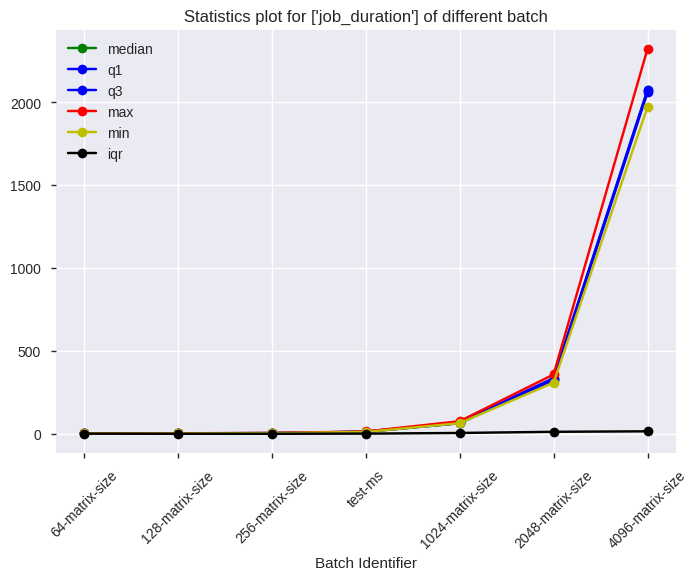

In [17]:
parameter_selected = ["job_duration"]
colour = ["g", "b", "b", "r", "y", "k"]
quantities = ["median", "q1", "q3", "max", "min", "iqr"]

inspection.plot_interpolated_statistics_of_inspection_parameters(statistical_results_dict=dftotal_statistics,
                                                      identifier_inspection_list=identifier_inspection,
                                                      inspection_parameters=parameter_selected,
                                                      colour_list=colour,
                                                      statistical_quantities=quantities,
                                                      title_ylabel= "")

## Box Plots interpolated for `elapsed_time`

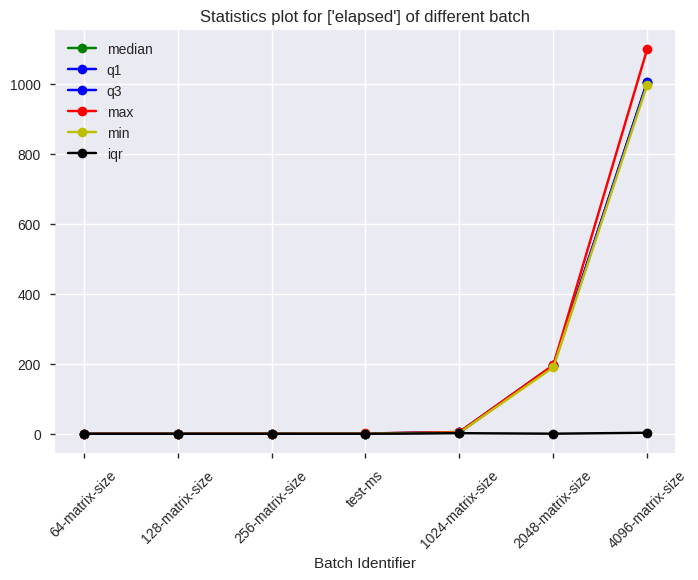

In [18]:
parameter_selected = ["elapsed"]
colour = ["g", "b", "b", "r", "y", "k"]
quantities = ["median", "q1", "q3", "max", "min", "iqr"]
inspection.plot_interpolated_statistics_of_inspection_parameters(statistical_results_dict=dftotal_statistics,
                                                      identifier_inspection_list=identifier_inspection,
                                                      inspection_parameters=parameter_selected,
                                                      colour_list=colour,
                                                      statistical_quantities=quantities,
                                                      title_ylabel= "")

# Inspection Time analysis

In [19]:
df_tot_time = inspection.create_inspections_time_dataframe(df_total, identifier_inspection)

## Inspection Builds Time

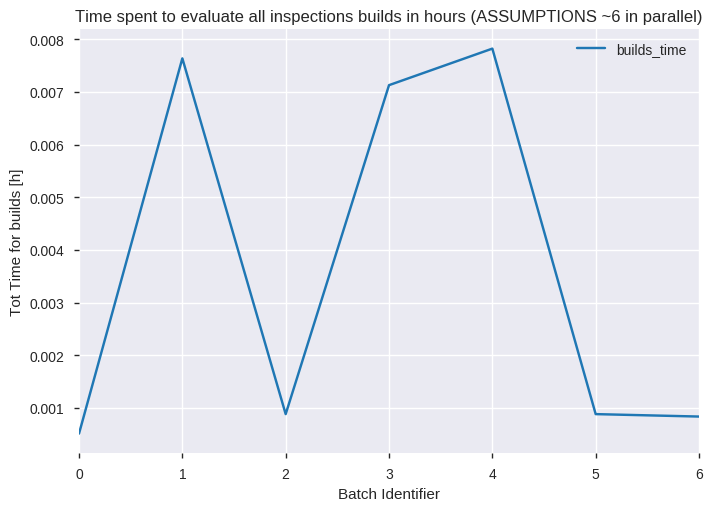

In [20]:
inspection.create_plot_from_df(df_tot_time, 
            columns= ["batches","builds_time"],
            title_plot="Time spent to evaluate all inspections builds in hours (ASSUMPTIONS ~6 in parallel)",
            x_label="Batch Identifier", 
            y_label="Tot Time for builds [h]",
            static=static_figure)

## Inspection Jobs Time

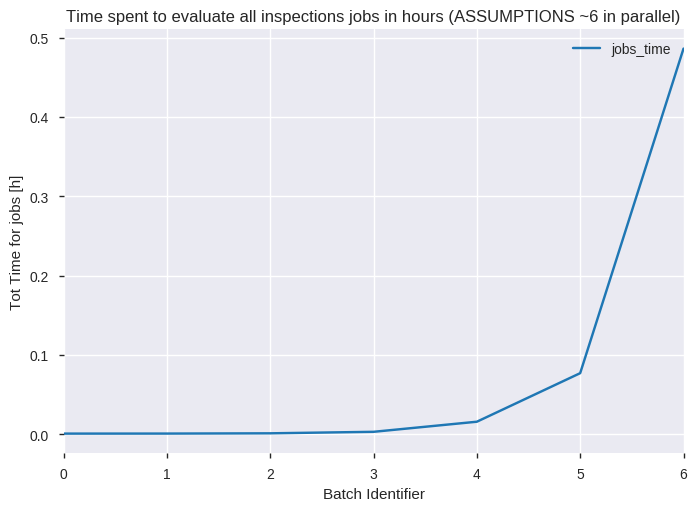

In [21]:
inspection.create_plot_from_df(df_tot_time, 
            columns= ["batches","jobs_time"],
            title_plot="Time spent to evaluate all inspections jobs in hours (ASSUMPTIONS ~6 in parallel)",
            x_label="Batch Identifier", 
            y_label="Tot Time for jobs [h]",
            static=static_figure)

## Inspection Builds + Jobs Time

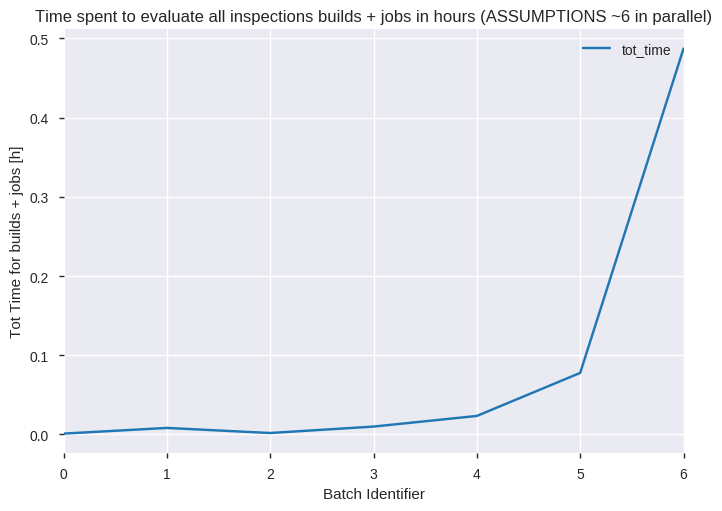

In [22]:
inspection.create_plot_from_df(df_tot_time, 
            columns= ["batches","tot_time"],
            title_plot="Time spent to evaluate all inspections builds + jobs in hours (ASSUMPTIONS ~6 in parallel)",
            x_label="Batch Identifier", 
            y_label="Tot Time for builds + jobs [h]",
            static=static_figure)